
# Comparing Toronto and Global Temperature

## Table of Contents
<ul>
<li><a href="#ExtractingData">Extracting Data from the database</a></li>
<li><a href="#ReadingFromCSV">Reading the data from CSV files</a></li>
<li><a href="#DrawAverage">Draw chart with Average</a></li>
<li><a href="#Dealingwithmissingdata">Dealing with missing data</a></li>
<li><a href="#MovingAverageCalculator">Moving Average Calculator</a></li>
<li><a href="#Observations">Observations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
#Imports
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

<a id='ExtractingData'></a>
## 1. Extracting Data from the database
### 1.1 Finding nearest city

I used this query to find all cities in canada to select the closest to Saskatoon.

`SELECT * 
FROM city_list
WHERE country = 'Canada'`

It returns 6 cities, I select Totonto as the city that I am going to use.

### 1.2 Extracting City Data

I used following query to fetch Toronto data:

`SELECT * 
FROM city_data
WHERE city = 'Toronto'`

Data is saved in Toronto.csv file.

### 1.3 Extracting Global Data

I used following query to fetch Global data:

`SELECT * 
FROM global_data`

I saved the data in Global.csv file.

<a id='ReadingFromCSV'></a>
## 2. Reading the data from CSV files
### 2.1 Reading city data

In [2]:
toronto = pnd.read_csv('Toronto.csv',sep=',')

In [3]:
toronto.head()

,year,city,country,avg_temp
0,1743,Toronto,Canada,-0.11
1,1744,Toronto,Canada,8.38
2,1745,Toronto,Canada,-3.96
3,1746,Toronto,Canada,NaN
4,1747,Toronto,Canada,NaN


### 2.1 Reading global data

In [4]:
glob = pnd.read_csv('Global.csv',sep=',')

In [5]:
glob.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


<a id='DrawAverage'></a>
## 3. Draw chart with Average

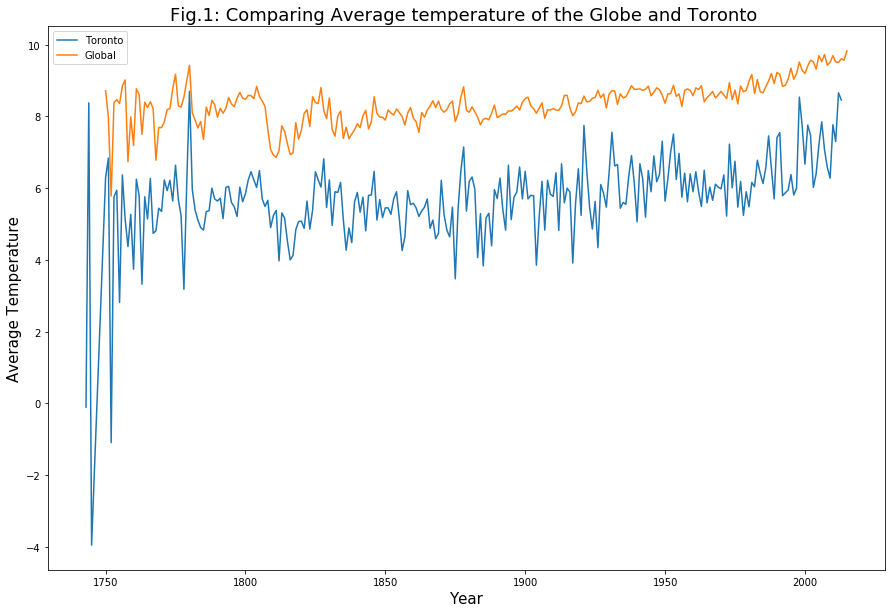

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=toronto['year'], y=toronto['avg_temp'], ax=ax)
sns.lineplot(x=glob['year'], y=glob['avg_temp'], ax=ax)
ax.set_xlabel(xlabel="Year",fontsize=15)
ax.set_ylabel(ylabel="Average Temperature", fontsize=15)
ax.set_title(label="Fig.1: Comparing Average temperature of the Globe and Toronto ",fontsize=18)
ax.legend(['Toronto','Global'])
plt.show()

As **Fig.1** shows, it is obviuse that Toronto is colder than global average. However, it is dificult to see a trend that shows how the temprature is chaning during the time. Therefore, I will calculate 5 and 10 year moving avarage to be able to see the trends better.

<a id = 'Dealingwithmissingdata'></a>
### 4. Dealing with missing data

In [7]:
toronto[toronto['avg_temp'].isna()]

,year,city,country,avg_temp
3,1746,Toronto,Canada,NaN
4,1747,Toronto,Canada,NaN
5,1748,Toronto,Canada,NaN
6,1749,Toronto,Canada,NaN


We have 4 row which are null, There are several options to fill this missing data:

1- We can fill it with the average temprature

2- We can fill it with random temorators from the dataset

3- We can remove them.

4- I think it is a good idea to fill them with 3 year moving average.

In [8]:
for i in toronto[toronto['avg_temp'].isna()].index:
    toronto.loc[i,'avg_temp'] = np.average(toronto['avg_temp'].loc[i-3:i-1]).round(2)

In [9]:
toronto[toronto['avg_temp'].isna()]

,year,city,country,avg_temp


All the null data is replaced with 3 year moving average.

<a id = 'MovingAverageCalculator'></a>
### 5. Moving Average Calculator

Following method calculates `n` year **moving avarage** for dataframe `ds`. For example, movingAverage(toronto,10) will calculate 10 year moving average for tronto dataframe.

This method used a for loop for calculating moving average which is not good for datasets with large amount of data. I tried to implement it without loops but I was not able to do it.

In [10]:
def movingAverage(ds,n):
    n = n-1;
    for i in ds.index:
        if i >= n:
            ds.loc[i,str(n+1)+'_ma'] = np.average(ds['avg_temp'].loc[i-n:i]).round(2)
        else:
            ds.loc[i,str(n+1)+'_ma'] = None

In [11]:
movingAverage(toronto,5)
movingAverage(glob,5)
movingAverage(toronto,10)
movingAverage(glob,10)
movingAverage(toronto,15)
movingAverage(glob,15)
movingAverage(toronto,50)
movingAverage(glob,50)

<a id='Observations'></a>
### 6. Observations

#### 6.1 Comparing 5-year moving average temperature

As **Fig.2** shows 5-year moving average of Toronto is way lower than the global 5-year moving average. This figure is better than Fig.1 because it is not showing all the details that are not helpful. Moreover, an increasing temperature trend is visible on both global and Toronto data.  

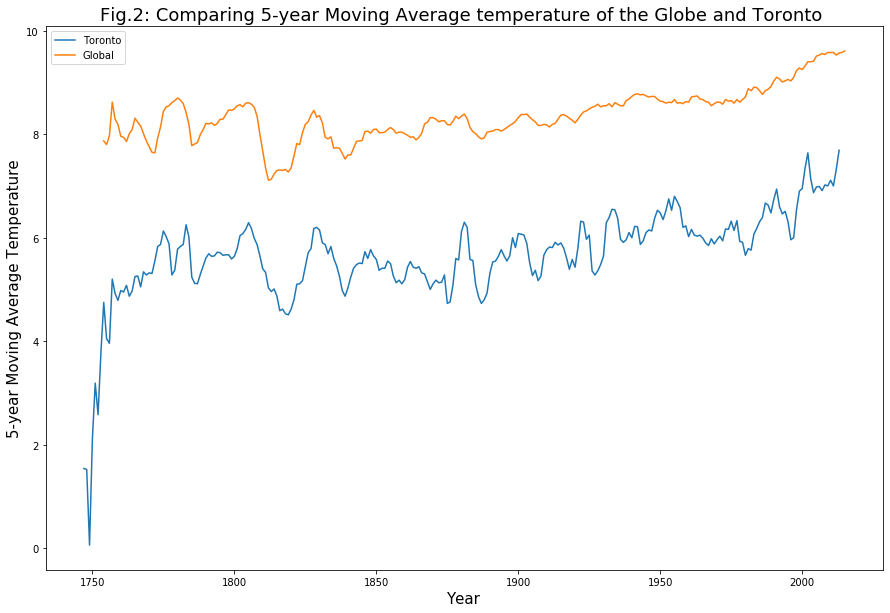

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=toronto['year'], y=toronto['5_ma'], ax=ax)
sns.lineplot(x=glob['year'], y=glob['5_ma'], ax=ax)
ax.set_xlabel(xlabel="Year",fontsize=15)
ax.set_ylabel(ylabel="5-year Moving Average Temperature", fontsize=15)
ax.set_title(label="Fig.2: Comparing 5-year Moving Average temperature of the Globe and Toronto ",fontsize=18)
ax.legend(['Toronto','Global'])
plt.show()

#### 6.2 Comparing 10-year moving average temperature

**Fig.3** shows 10-year moving average temperature for the globe and Toronto. Similar to **Fig.2** it is showing fewer details comparing to **Fig.1** and the increasing trend is more visible. 

Increasing the moving average from 5-year to 10-year helps to have a better understanding of changes. In **Fig.3** a noticeable change has happened from almost 1960 to 1990 for Toronto. In this period temperature decreased and increased again. Before 1960, the 10-year moving average was increasing but from 1960 to almost 1975 it decreased and increased again from 1975 to 1990. This change is not noticeable in **Fig.2**.

The change from 1810 to 1835 for both the globe and Toronto is more noticeable in this figure as well.

Another observation is that variation range in Toronto is higher that the globe.


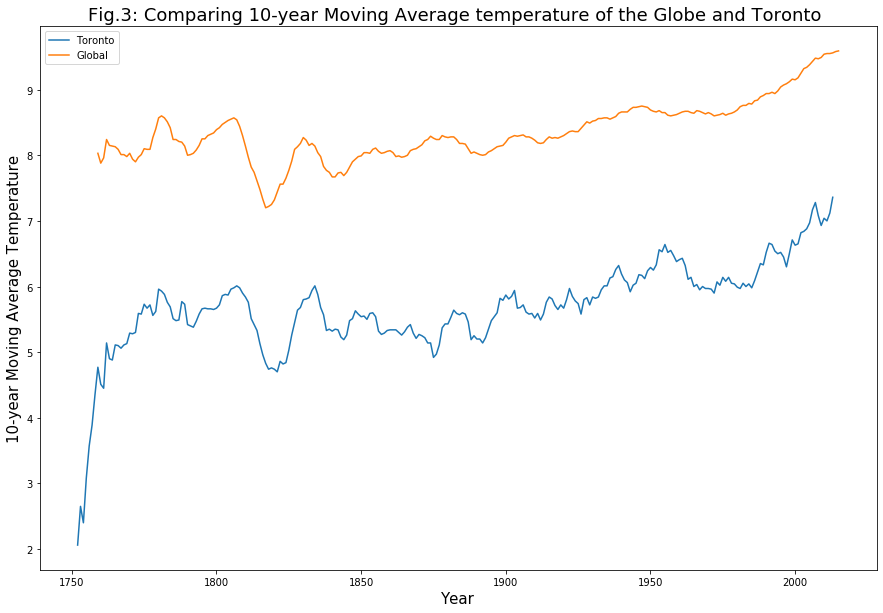

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=toronto['year'], y=toronto['10_ma'], ax=ax)
sns.lineplot(x=glob['year'], y=glob['10_ma'], ax=ax)
ax.set_xlabel(xlabel="Year",fontsize=15)
ax.set_ylabel(ylabel="10-year Moving Average Temperature", fontsize=15)
ax.set_title(label="Fig.3: Comparing 10-year Moving Average temperature of the Globe and Toronto ",fontsize=18)
ax.legend(['Toronto','Global'])
plt.show()

#### 6.3 Comparing 50-year moving average temperature

**Fig.4** shows 50-year moving average temperature. There are no many details in this figure. Both changes from 1810 to 1835 and from 1960 to 1990 are hidden here (Especially for Toronto). It seems a 10-year moving average is giving a better idea of the data comparing to the 50-year and 5-year moving average. 10-year moving average shows enough data without misleading details and it is not too general, not similar to the 50-year moving average.

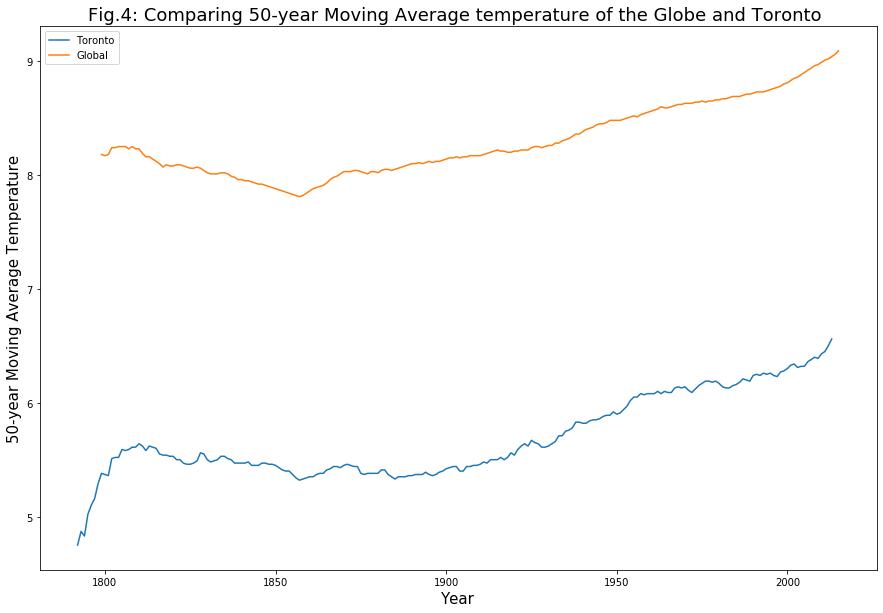

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=toronto['year'], y=toronto['50_ma'], ax=ax)
sns.lineplot(x=glob['year'], y=glob['50_ma'], ax=ax)
ax.set_xlabel(xlabel="Year",fontsize=15)
ax.set_ylabel(ylabel="50-year Moving Average Temperature", fontsize=15)
ax.set_title(label="Fig.4: Comparing 50-year Moving Average temperature of the Globe and Toronto ",fontsize=18)
ax.legend(['Toronto','Global'])
plt.show()

#### 6.4 Comparing 10-yearand 50-year moving average temperature

**Fig.5** shows both 10-year and 50-year moving averages for the Globe and Toronto. It seems this mixed figure gives a good understanding of the data.

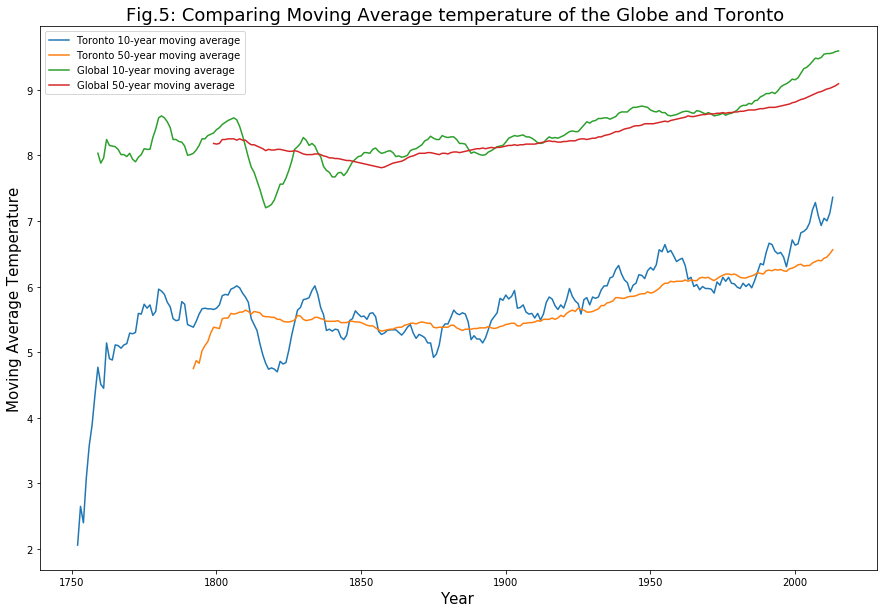

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=toronto['year'], y=toronto['10_ma'], ax=ax)
sns.lineplot(x=toronto['year'], y=toronto['50_ma'], ax=ax)
sns.lineplot(x=glob['year'], y=glob['10_ma'], ax=ax)
sns.lineplot(x=glob['year'], y=glob['50_ma'], ax=ax)
ax.set_xlabel(xlabel="Year",fontsize=15)
ax.set_ylabel(ylabel="Moving Average Temperature", fontsize=15)
ax.set_title(label="Fig.5: Comparing Moving Average temperature of the Globe and Toronto ",fontsize=18)
ax.legend(['Toronto 10-year moving average','Toronto 50-year moving average','Global 10-year moving average','Global 50-year moving average'])
plt.show()

<a id='conclusions'></a>
## Conclusion:

#### 1- Toronto is generally colder than the globe's average.
#### 2- Both the Globe and Toronto have gotten warmer during the last 270 years.
#### 3- Variation range is higher for Toronto.
#### 4- There was a radical climate change between 1960 to 1990 in Toronto.
#### 5- There was a radical climate change between 1810 to 1835 both globally and in Toronto.
#### 6- Selecting the best number of `n` in `n-year moving average` is important to omit the unnecessary details and keep the important changes.